In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
x = df.iloc[:,3:]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


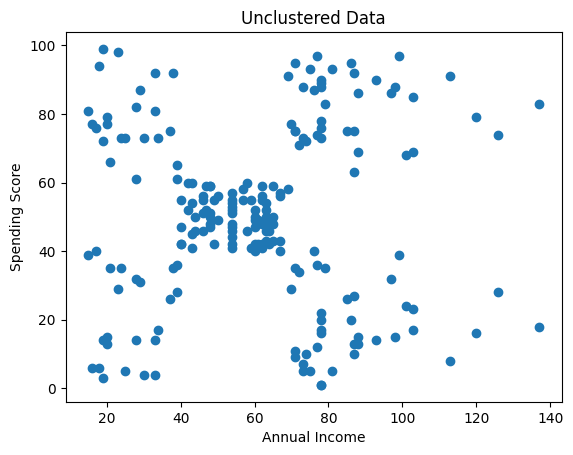

In [8]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [9]:
#Find possible ideal clusters. Methods are: 1) Elbow method, 2) Silhouette method

from sklearn.cluster import KMeans, AgglomerativeClustering

In [10]:
#make clusters(1.model initialisation)
km = KMeans(n_clusters=3)

In [11]:
#(2. fitting model)
#(3. Predicting label)
#(4. visualisation)
km.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [12]:
km.inertia_

106348.37306211119

In [13]:
sse=[]
for k in range(1, 16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [14]:
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 60127.96638228508,
 32226.561192697452,
 30699.076898759504,
 28180.531333943836,
 19657.783608703947,
 17872.838154158504,
 16355.038550983903,
 17000.48304403929,
 13760.028584307289,
 12283.842219417218]

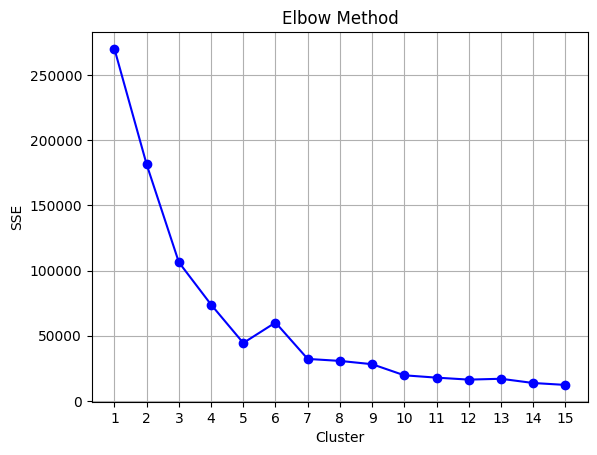

In [15]:
plt.title('Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1,16), sse, color = "Blue", marker = "o")


In [16]:
#silhouette method

from sklearn.metrics import silhouette_score

In [17]:
silh=[]
for k in range(2, 16):
    km = KMeans(n_clusters = k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [18]:
silh

[np.float64(0.38908480253667166),
 np.float64(0.46761358158775435),
 np.float64(0.4937945814354117),
 np.float64(0.553931997444648),
 np.float64(0.5375812731362782),
 np.float64(0.5315303699289704),
 np.float64(0.45556242418344917),
 np.float64(0.461684164916706),
 np.float64(0.4467433411591145),
 np.float64(0.437841976811071),
 np.float64(0.42903470410496636),
 np.float64(0.39757516777812546),
 np.float64(0.4255479679183008),
 np.float64(0.4320879670477112)]

In [19]:
score

np.float64(0.4320879670477112)

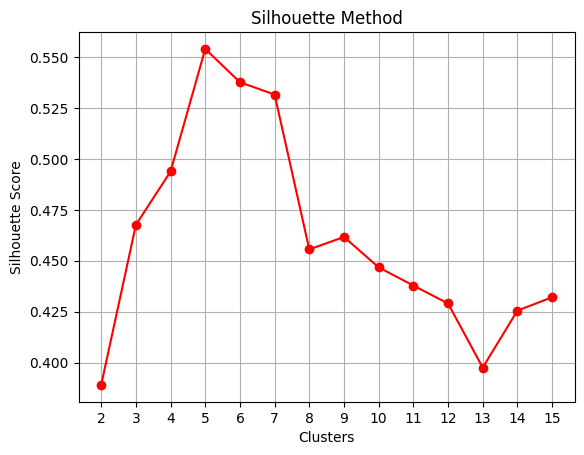

In [20]:
plt.title("Silhouette Method")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 16))
plt.plot(range(2,16), silh, color = "Red", marker = "o")
plt.grid()

<BarContainer object of 14 artists>

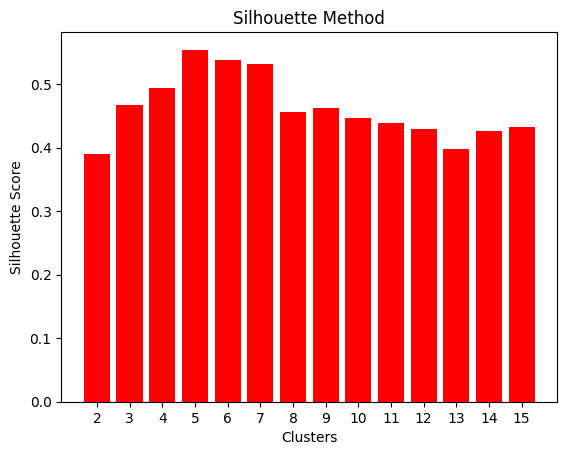

In [21]:
plt.title("Silhouette Method")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 16))
plt.bar(range(2,16), silh, color = "Red")

In [22]:
km = KMeans(n_clusters = 5 , random_state = 0)

In [23]:
labels = km.fit_predict(x)

In [24]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

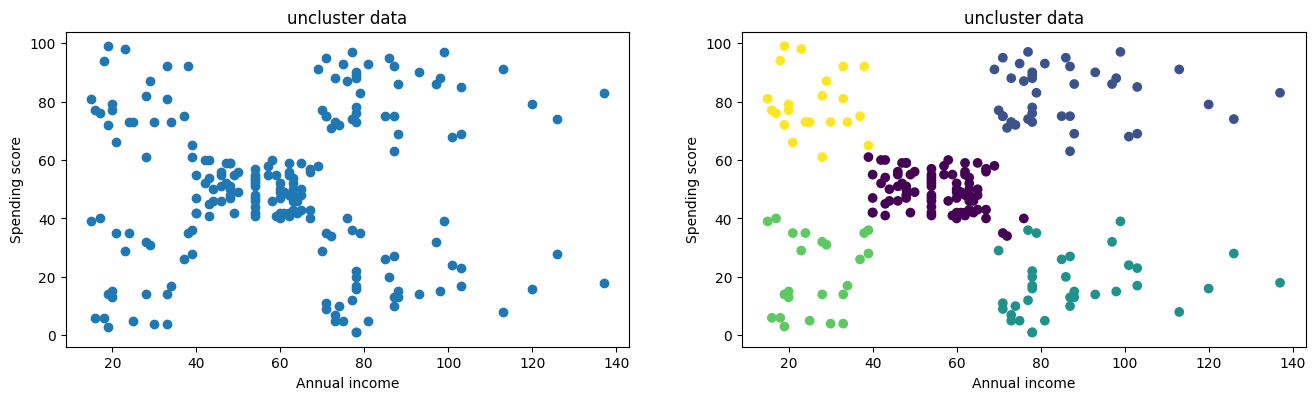

In [25]:
plt.figure(figsize = (16,9))

plt.subplot(2,2,1)
plt.title('uncluster data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)']);

plt.subplot(2,2,2)
plt.title('uncluster data')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c = labels);

In [29]:
cent = km.cluster_centers_

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

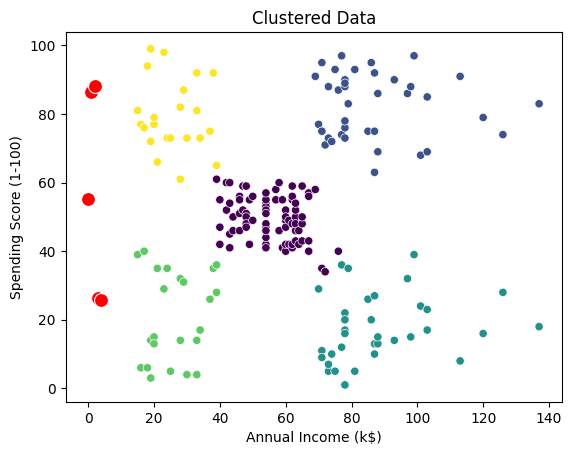

In [35]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0], s=100, color='red')

In [36]:
df[labels==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [37]:
agl = AgglomerativeClustering(n_clusters=5)

In [38]:
alabels = agl.fit_predict(x)

In [39]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<Axes: title={'center': 'KMEANS'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

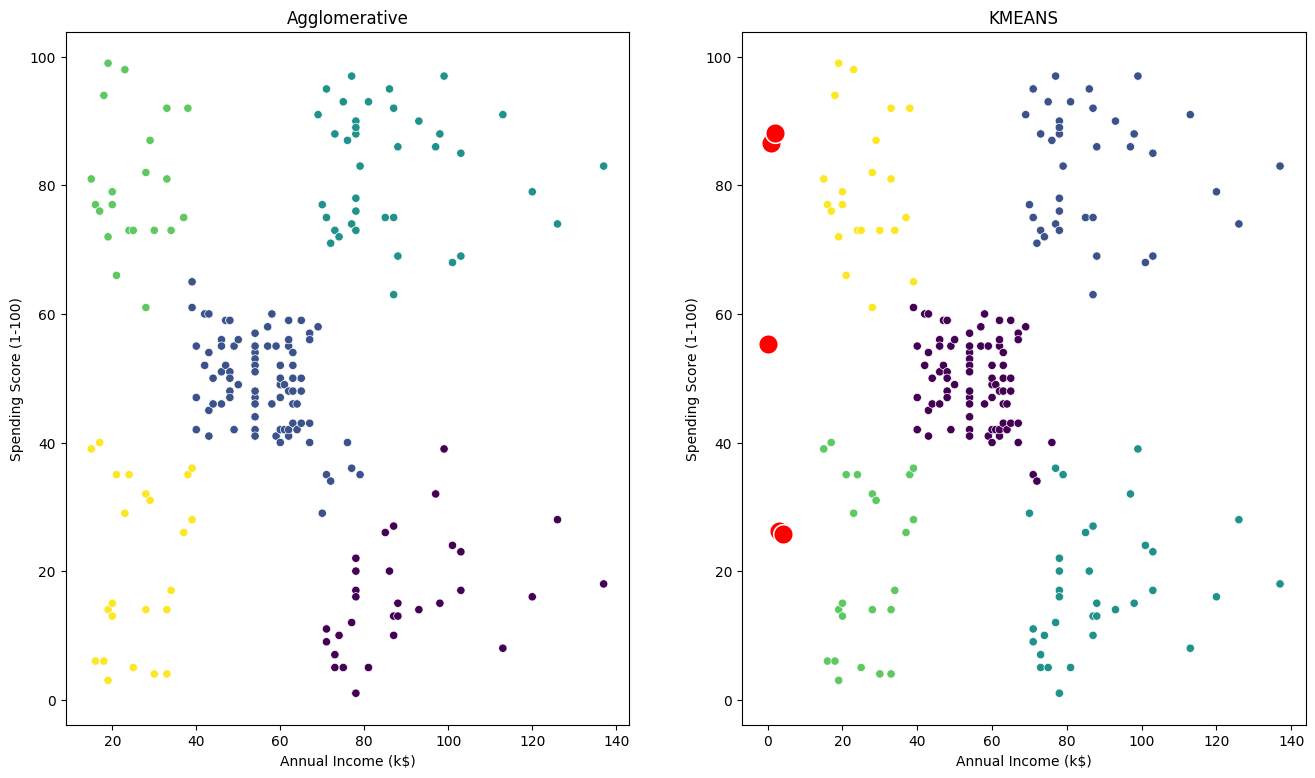

In [41]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0], s=200, color='red')